**In notebook settings do not select Omit code cell output when saving this notebook **


In this assignement you will build a decision tree and a random forest classifier to classify x ray images of potential covid 19 patients. For Test and training data refer to canvas.

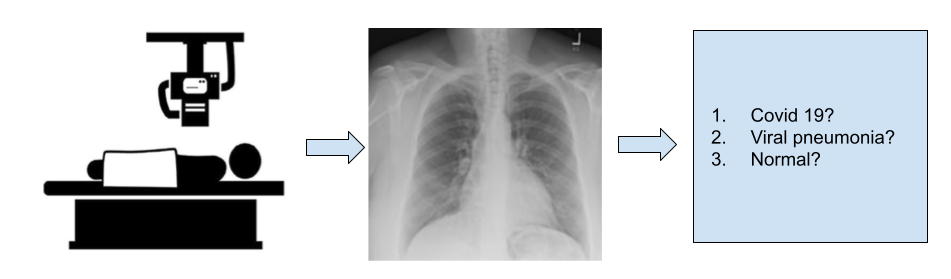

Step 01 : import any libraries you want here. Some common ones are already imported.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Step 02 : upload the data from canvas to the top level folder of your google drive. write code to load the data from the google drive.

In [19]:
root_path = '/home/matt/CSC665/Covid19-dataset'

# load data and generate corresponding labels
train = tf.keras.utils.image_dataset_from_directory(f'{root_path}/train', labels='inferred', batch_size=251)
test = tf.keras.utils.image_dataset_from_directory(f'{root_path}/test', labels='inferred', batch_size=251)

x_train, y_train = next(iter(train))
x_test, y_test = next(iter(test))


class_names = train.class_names


Found 251 files belonging to 3 classes.


Found 66 files belonging to 3 classes.


Step 03: visualize one x-ray image from each type : "covid 19", "viral pneumonia", "normal"

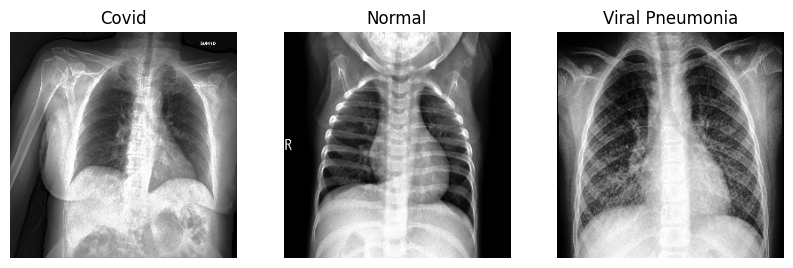

In [22]:
plt.figure(figsize=(10, 10))
#get one image from each class
for i in range(len(class_names)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[y_train == i][0] / 255)
    plt.title(class_names[i])
    plt.axis("off")

Reshaping data to work with sklearn

In [33]:
x_train = np.reshape(x_train, (x_train.shape[0], -1)) 
x_train = tf.cast(x_train, tf.int32)
x_train = x_train.numpy()

x_test = np.reshape(x_test, (x_test.shape[0], -1))
x_test = tf.cast(x_test, tf.int32)
x_test = x_test.numpy()


Step 04 : Find the best decision tree to classifiy the x-ray images. Remember to set the random seed for reproducibiity. Find the best critirion and the max_depth using 5 fold cross validation.  

In [25]:
parameters = {
    'criterion':('entropy', 'gini'),
    'max_depth':(10, 20, 30, 40, 50, None)
}
clf = GridSearchCV(DecisionTreeClassifier(random_state = 0), parameters, cv=5, verbose=3)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...criterion=entropy, max_depth=10;, score=0.765 total time=  19.4s
[CV 2/5] END ...criterion=entropy, max_depth=10;, score=0.780 total time=  16.8s
[CV 3/5] END ...criterion=entropy, max_depth=10;, score=0.760 total time=  15.6s
[CV 4/5] END ...criterion=entropy, max_depth=10;, score=0.840 total time=  17.6s
[CV 5/5] END ...criterion=entropy, max_depth=10;, score=0.720 total time=  15.9s
[CV 1/5] END ...criterion=entropy, max_depth=20;, score=0.765 total time=  16.1s
[CV 2/5] END ...criterion=entropy, max_depth=20;, score=0.780 total time=  16.8s
[CV 3/5] END ...criterion=entropy, max_depth=20;, score=0.760 total time=  17.4s
[CV 4/5] END ...criterion=entropy, max_depth=20;, score=0.840 total time=  16.8s
[CV 5/5] END ...criterion=entropy, max_depth=20;, score=0.720 total time=  16.2s
[CV 1/5] END ...criterion=entropy, max_depth=30;, score=0.765 total time=  19.2s
[CV 2/5] END ...criterion=entropy, max_depth=30;

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': (10, 20, 30, 40, 50, None)},
             verbose=3)

Step 05 : Draw the confution matrix. Starter code is given below.

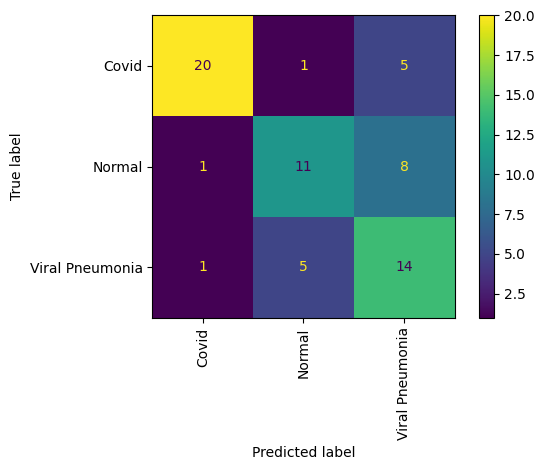

In [34]:
ConfusionMatrixDisplay.from_estimator(
    clf, x_test, y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

Step 06 : Find a random forest classifier to classifiy the x-ray images. Remember to set the random seed for reproducibiity. Find the best critirion and the number of trees needed using 5 fold cross validation.

In [35]:
parameters = {
    'n_estimators':(10,20,30,40,50,60,70,80,90,100)
}
clf = GridSearchCV(RandomForestClassifier(random_state = 0), parameters, cv=5, verbose=3)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...................n_estimators=10;, score=0.843 total time=   0.4s
[CV 2/5] END ...................n_estimators=10;, score=0.880 total time=   0.4s
[CV 3/5] END ...................n_estimators=10;, score=0.880 total time=   0.4s
[CV 4/5] END ...................n_estimators=10;, score=0.940 total time=   0.4s
[CV 5/5] END ...................n_estimators=10;, score=0.800 total time=   0.3s
[CV 1/5] END ...................n_estimators=20;, score=0.863 total time=   0.6s
[CV 2/5] END ...................n_estimators=20;, score=0.860 total time=   0.6s
[CV 3/5] END ...................n_estimators=20;, score=0.880 total time=   0.6s
[CV 4/5] END ...................n_estimators=20;, score=0.900 total time=   0.6s
[CV 5/5] END ...................n_estimators=20;, score=0.840 total time=   0.6s
[CV 1/5] END ...................n_estimators=30;, score=0.863 total time=   0.8s
[CV 2/5] END ...................n_estimators=30;

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': (10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100)},
             verbose=3)

Step 07 : Draw the confution matrix. Starter code is given below.

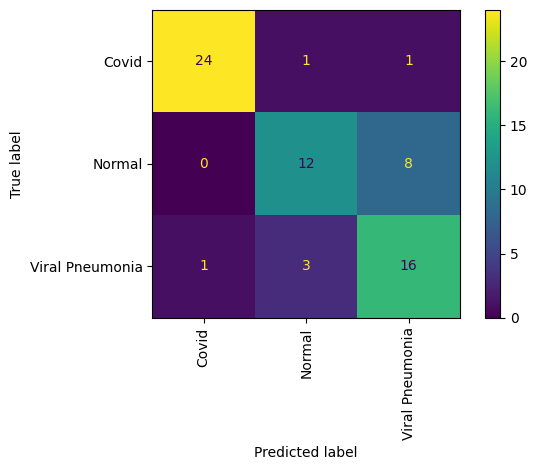

In [36]:
ConfusionMatrixDisplay.from_estimator(
    clf, x_test, y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()